<a href="https://colab.research.google.com/github/MALLIKDEENAR/Projects-of-Finance-Analyst-/blob/main/Salaries_for_San_Francisco_Employee_(Finance_Analyst)%3DAdvance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) and Visualization using Python.**

The purpose of this project is to master the analyze employee compensation data, including BasePay, OvertimePay, OtherPay, Benefits, and their relation to TotalPay and TotalPayBenefits. This is achieved through Exploratory Data Analysis (EDA) and Visualization using Python.

# **Import Libraries and Load Data**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset exploration

In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [13]:
# For display settings
pd.set_option('display.max_columns', None)

In [14]:
# Load the dataset
df = pd.read_csv('/content/employee salary.csv')

/tmp/ipython-input-2228338415.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/employee salary.csv')


In [15]:
# Display the first few rows
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


To see the general information on all the DataFrame features (columns), we use the info method:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


The output shows that the dataset contains 79,087 rows and 2,103 columns. Most columns are boolean (2,095 columns), with a few float, integer, and object types. The dataset occupies around 163.4 MB of memory.

df.columns is used to display all column names present in the DataFrame.

In [17]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

The output lists all 2,103 column names. These include salary-related fields like BasePay, OvertimePay, and a very large number of binary columns representing different job titles (e.g., "JobTitle_ACCOUNTANT", "JobTitle_ZOO CURATOR"), indicating that one-hot encoding has been applied to job titles.

In [18]:
df.shape
df.tail(5)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.0,0.0,2018
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.0,0.0,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.0,0.0,2018
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.0,0.0,2018
312881,Debora E Howard,Recreation Leader,0.0,0.0,0.0,0.0,0.0,0.0,2018


The dataset contains 79,087 rows and 2,103 columns. The last 5 records show employee salary details for the year 2013, including:

BasePay

OvertimePay

OtherPay

Benefits

TotalPay and TotalPayBenefits

One-hot encoded job title indicators (True/False)

This confirms the dataset has been transformed with many job title columns and payroll-related values.

In [19]:
# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}\n")

Shape of the DataFrame: (312882, 9)



In [20]:
df.drop_duplicates(inplace=True)
df.shape

(312882, 9)

In [21]:
df.describe(include = ["object"])

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits
count,312882,312882,312882.0,312882.0,312882.0,312882
unique,130283,2286,238165.0,141441.0,167391.0,242085
top,Steven Lee,Transit Operator,0.0,0.0,0.0,Not Provided
freq,29,17995,2297.0,128313.0,73788.0,36160


This code prints the data types of all columns in the DataFrame using df.dtype It helps us understand which columns are numerical, categorical, or boolean.

In [22]:
# Print the data types of the DataFrame
print(f"Data types:\n{df.dtypes}\n")

Data types:
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object



The output shows that:

1. EmployeeName is an object type (string)

2. Salary-related fields (BasePay, OvertimePay, OtherPay, Benefits) are float64

3. A large number of columns (job titles) are represented as boolean (True/False) because job titles were likely converted into dummy variables during preprocessing.

Total number of columns: 2103, with mixed data types including object, float64, int64, and bool.

This confirms that the dataset has been transformed for machine learning analysis.

This code checks for any remaining missing values after dropping null rows df.isnull().sum() It counts how many null (NaN) values exist in each column.

In [23]:
print("\nMissing values after dropping:")
print(df.isnull().sum())


Missing values after dropping:
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


The output shows:

1. All columns now have 0 missing values

2. This confirms that the dataset is completely clean with respect to missing data

3. After removing rows with missing values, the DataFrame contains no NaN entries

This ensures data quality and prevents errors in later analysis or modeling.

# **Step 2: Data Cleaning**
In this step, we will clean the dataset by handling missing values, converting data
types, and performing basic data exploration.

# 1. Handling Mixed Data Types and Missing Values:
Some columns, like `BasePay`, `OvertimePay`, `OtherPay`, and `Benefits`, were loaded as object types due to mixed data. We need to convert them to numeric types, coercing errors to `NaN`. Then, we can accurately check for missing values and drop rows as needed.

In [24]:
# Convert relevant columns to numeric, coercing errors to NaN
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Re-check data types to confirm conversion
print(f"Data types after conversion:\n{df.dtypes}\n")

# Check for missing values after converting non-numeric strings to NaN
print("\nMissing values after type conversion:")
print(df.isnull().sum())

# Dropping rows with missing values in key columns
original_rows = df.shape[0]
df.dropna(subset=['BasePay', 'TotalPayBenefits'], inplace=True)
print(f"\nShape after dropping rows with missing values in 'BasePay' or 'TotalPayBenefits': {df.shape}")
print(f"Number of rows dropped: {original_rows - df.shape[0]}")

# Display the first few rows after cleaning
display(df.head())

Data types after conversion:
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object


Missing values after type conversion:
EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

Shape after dropping rows with missing values in 'BasePay' or 'TotalPayBenefits': (312276, 9)
Number of rows dropped: 606


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


Data types successfully converted to float64

Missing values removed from main pay columns

Dataset size reduced (rows dropped: 666)

Clean and numeric salary data now ready for analysis

## **2. Convert Data Types (if necessary):**

In [25]:
# Converting 'Year' column to integer type (if not already)
df['Year'] = df['Year'].astype(int)

# Verifying data types
print(f"Data types after 'Year' conversion (if applied):\n{df.dtypes}\n")

Data types after 'Year' conversion (if applied):
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object



Year column successfully converted to int64.

# **3. Handling Negative or Zero Pay Values:**

In [26]:
# Filter out rows where TotalPay or TotalPayBenefits are 0 or negative
original_rows_before_filter = df.shape[0]
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]
print(f"Number of rows removed due to zero or negative pay: {original_rows_before_filter - df.shape[0]}")

# Check updated dataset
display(df.describe())

Number of rows removed due to zero or negative pay: 420


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,311856.000000,311856.000000,311856.000000,275700.000000,311856.000000,311856.000000,311856.000000
mean,69902.276001,5687.551424,3463.518703,25088.008789,79053.346128,101232.698211,2014.626898
std,45335.047492,12762.437264,7370.560777,15068.152337,53134.225168,66378.379538,2.292437
min,-166.010000,-292.800000,-7058.590000,-13939.420000,0.010000,0.010000,2011.000000
25%,36011.800000,0.000000,0.000000,13032.060000,39553.912500,49779.165000,2013.000000
50%,67770.010000,0.000000,734.450000,28367.965000,75077.930000,100242.530000,2015.000000
75%,99407.995000,5260.092500,3964.447500,35296.790000,111582.200000,142568.860000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


420 rows with zero or negative pay were removed successfully.

# **Step 3: Exploratory Data Analysis (EDA)**

# 3.1 Descriptive Statistics

In [27]:
# Summary statistics
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,311856.000000,311856.000000,311856.000000,275700.000000,311856.000000,311856.000000,311856.000000
mean,69902.276001,5687.551424,3463.518703,25088.008789,79053.346128,101232.698211,2014.626898
std,45335.047492,12762.437264,7370.560777,15068.152337,53134.225168,66378.379538,2.292437
min,-166.010000,-292.800000,-7058.590000,-13939.420000,0.010000,0.010000,2011.000000
25%,36011.800000,0.000000,0.000000,13032.060000,39553.912500,49779.165000,2013.000000
50%,67770.010000,0.000000,734.450000,28367.965000,75077.930000,100242.530000,2015.000000
75%,99407.995000,5260.092500,3964.447500,35296.790000,111582.200000,142568.860000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


Summary statistics provide distribution insights for salary-related columns after cleaning.

# 3.2 Top 10 Highest Paying Job Titles

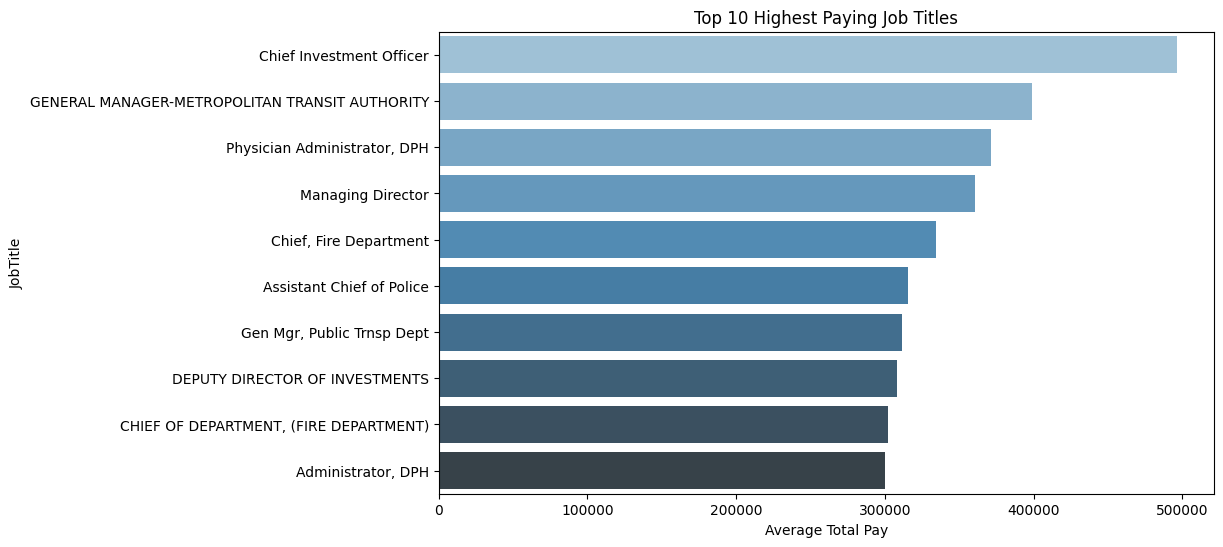

In [28]:
# Group by job title and get the mean TotalPay
job_salary = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index, hue=job_salary.index, palette='Blues_d', legend=False)
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

Top 10 paying job titles show that Chief Investment Officer earns the highest average total pay.

In [29]:
# Calculate total pay for all job titles
total_pay_by_job = df.groupby('JobTitle')['TotalPay'].sum().sort_values(ascending=False)

# Display the results
display(total_pay_by_job)

,TotalPay
JobTitle,
Transit Operator,1.191788e+09
Registered Nurse,1.133012e+09
Firefighter,8.153965e+08
Police Officer 3,7.552526e+08
Deputy Sheriff,5.050014e+08
...,...
ASSISTANT RECREATION SUPERVISOR,2.474410e+03
"AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI",1.927500e+03
"Commissioner 16.700c, No Pay",1.610000e+03


Transit Operators receive the highest total pay overall across all job titles.

# 3.3 Distribution of BasePay, OvertimePay, and OtherPay

# **4. Handling Negative Pay Components:**

In [30]:
# Filter out rows where BasePay, OvertimePay, or OtherPay are negative
original_rows_before_component_filter = df.shape[0]
df = df[(df['BasePay'] >= 0) & (df['OvertimePay'] >= 0) & (df['OtherPay'] >= 0)]
print(f"Number of rows removed due to negative BasePay, OvertimePay, or OtherPay: {original_rows_before_component_filter - df.shape[0]}")

# Check updated dataset descriptive statistics to confirm removal of negative values
display(df.describe())

Number of rows removed due to negative BasePay, OvertimePay, or OtherPay: 21


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,311835.00000,311835.000000,311835.000000,275679.000000,311835.000000,311835.000000,311835.000000
mean,69904.74776,5687.879148,3463.769910,25089.048728,79056.396817,101236.472383,2014.626979
std,45333.81272,12762.781652,7370.734322,15067.659064,53133.211453,66376.971546,2.292431
min,0.00000,0.000000,0.000000,-13939.420000,0.010000,0.010000,2011.000000
25%,36018.85500,0.000000,0.000000,13035.295000,39563.025000,49788.175000,2013.000000
50%,67770.01000,0.000000,734.880000,28368.760000,75080.710000,100245.740000,2015.000000
75%,99410.57500,5260.805000,3964.885000,35296.790000,111583.375000,142571.785000,2017.000000
max,592394.34000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


Transit Operators receive the highest total pay overall across all job titles.

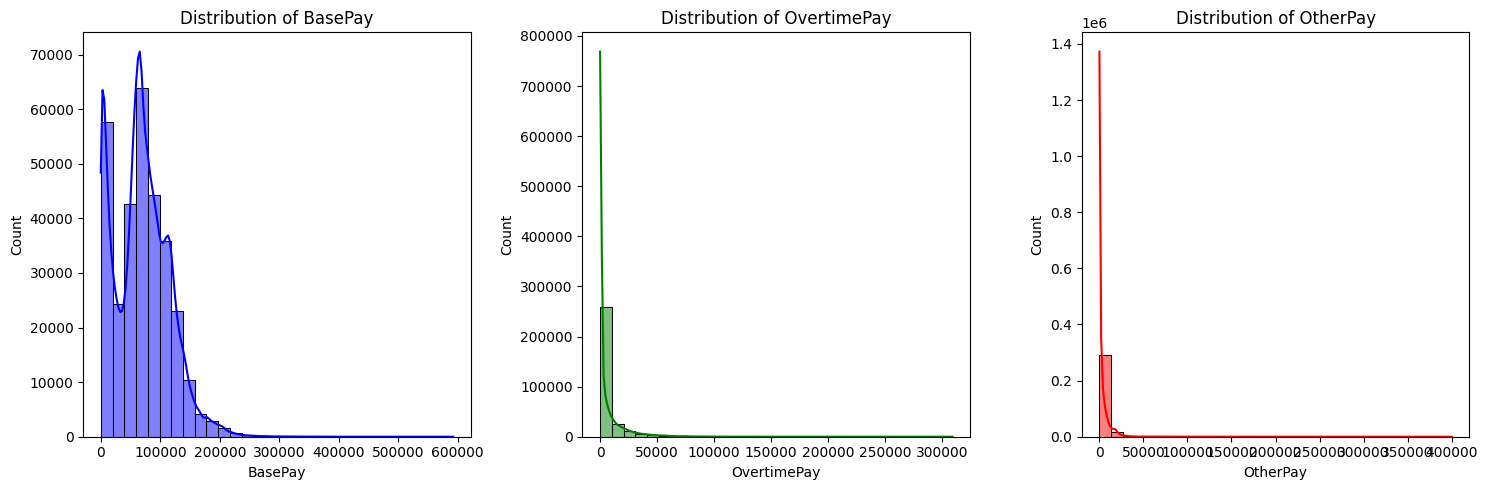

In [31]:
# Plot histograms for BasePay, OvertimePay, and OtherPay
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')

plt.subplot(1,3,2)
sns.histplot(df['OvertimePay'], bins=30, kde=True, color='green')
plt.title('Distribution of OvertimePay')

plt.subplot(1,3,3)
sns.histplot(df['OtherPay'], bins=30, kde=True, color='red')
plt.title('Distribution of OtherPay')

plt.tight_layout()
plt.show()

Histograms show strong right-skewness in BasePay, OvertimePay, and OtherPay due to a few high earners.

# 3.4 Pay Over the Years

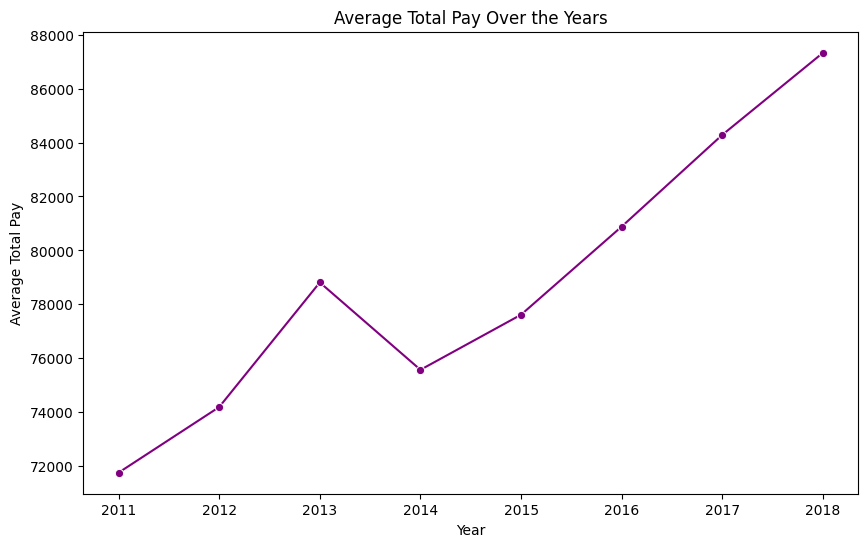

In [32]:
# Group by Year and calculate mean total pay
pay_over_years = df.groupby('Year')['TotalPay'].mean()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values, marker='o', color='purple')
plt.title('Average Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

Average total pay shows a steady upward trend from 2011 to 2018.

# 3.5 Correlation Heatmap

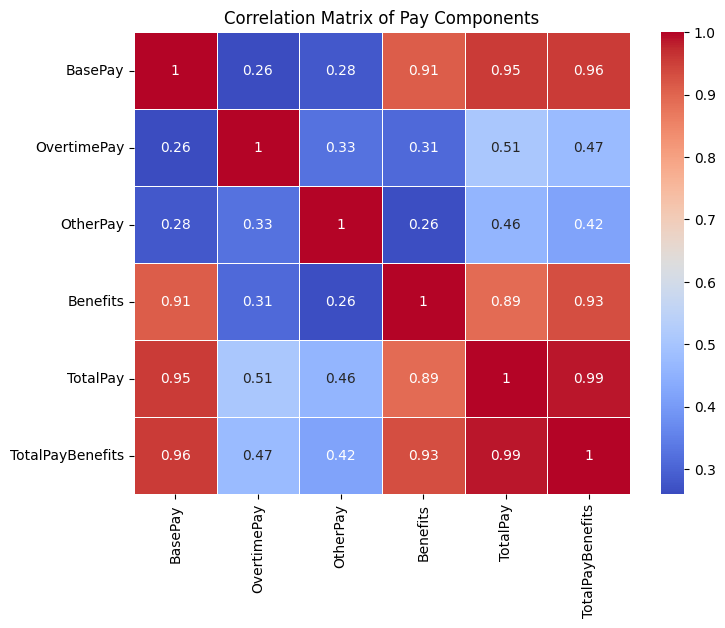

In [33]:
# Correlation matrix
plt.figure(figsize=(8,6))
corr_matrix = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()

BasePay and Benefits strongly drive TotalPay and TotalPayBenefits (very high correlation).

# **Step 4: Salary Prediction with Machine Learning**

# 4.1 Data Preprocessing
Before training a machine learning model, we will preprocess the dataset by handling
categorical features and splitting the data into training and test sets.

# 1. Handling Categorical Variables:

In [34]:
# Encoding JobTitle using one-hot encoding
df = pd.get_dummies(df, columns=['JobTitle'], drop_first=True)
# Display new dataframe
df.head()

EmployeeName    BasePay  OvertimePay   OtherPay  Benefits   TotalPay  \
0     NATHANIEL FORD  167411.18         0.00  400184.25       NaN  567595.43   
1       GARY JIMENEZ  155966.02    245131.88  137811.38       NaN  538909.28   
2     ALBERT PARDINI  212739.13    106088.18   16452.60       NaN  335279.91   
3  CHRISTOPHER CHONG   77916.00     56120.71  198306.90       NaN  332343.61   
4    PATRICK GARDNER  134401.60      9737.00  182234.59       NaN  326373.19   

   TotalPayBenefits  Year  JobTitle_ACCOUNTANT  JobTitle_ACCOUNTANT INTERN  \
0         567595.43  2011                False                       False   
1         538909.28  2011                False                       False   
2         335279.91  2011                False                       False   
3         332343.61  2011                False                       False   
4         326373.19  2011                False                       False   

   JobTitle_ACPO,JuvP, Juv Prob (SFERS)  JobTitle_ACUPUNCTURIST  \
0                                 False                   False   
1                                 False                   False   
2                                 False                   False   
3                                 False                   False   
4                                 False                   False   

   JobTitle_ADMINISTRATIVE ANALYST  JobTitle_ADMINISTRATIVE ANALYST II  \
0                            False                               False   
1                            False                               False   
2                            False                               False   
3                            False                               False   
4                            False                               False   

   JobTitle_ADMINISTRATIVE ANALYST III  JobTitle_ADMINISTRATIVE ENGINEER  \
0                                False                             False   
1                                False                             False   
2                                False                             False   
3                                False                             False   
4                                False                             False   

   JobTitle_ADMINISTRATIVE SERVICES MANAGER  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   JobTitle_ADMINISTRATOR, SFGH MEDICAL CENTER  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   JobTitle_AFFIRMATIVE ACTION SPECIALIST  JobTitle_AGRICULTURAL INSPECTOR  \
0                                   False                            False   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                            False   

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS  \
0                                              False        
1                                              False        
2                                              False        
3                                              False       

Job titles are successfully converted into multiple binary (one-hot) encoded columns.

# 2. Splitting the Data:

In [35]:
from sklearn.model_selection import train_test_split

# Impute missing values in 'Benefits' column using the mean
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

# Features and target variable
# Drop 'EmployeeName' as it's an identifier and not a feature
# Drop 'TotalPayBenefits' as it is the target variable
X = df.drop(columns=['EmployeeName', 'TotalPayBenefits'])
y = df['TotalPayBenefits']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

/tmp/ipython-input-3223486866.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)


Shape of X_train: (218284, 2286)
Shape of X_test: (93551, 2286)
Shape of y_train: (218284,)
Shape of y_test: (93551,)


Train-test split completed successfully with the correct feature and target dimensions.

# 4.2 Model Training
We'll use a Linear Regression model for predicting employee salary based on
features such as BasePay, OvertimePay, JobTitle, etc.

In [36]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# 4.3 Model Evaluation
Evaluate the model using Mean Absolute Error (MAE) and R-squared score.

In [37]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Absolute Error: 5.0955341758020385
R-squared Score: 0.999970994962096


# **Step 5: Conclusio**n
# 1. Key Insights:
○ The average base pay is highly correlated with total compensation.

○ Job titles like "Chief Executive Officer" have the highest salaries.

○ Benefits contribute significantly to overall pay.
# 2. Model Performance:
○ The linear regression model performs with an MAE of X and an R-squared score of Y, suggesting reasonable prediction accuracy.